In [1]:
import pixellib
from pixellib.semantic import semantic_segmentation
import cv2
from wincap import WindowCapture
from time import sleep;

In [2]:
frame = cv2.imread("images/hostel2.jpg")# cap.open("tcp://192.168.100.56:8888")
segment_video = semantic_segmentation()

In [3]:
# segment_video.process_camera_ade20k(cap, overlay=True, frames_per_second= 15, output_video_name="output_video.mp4", show_frames= True,
# frame_name= "Segmentation")
segment_video.load_ade20k_model("deeplabv3_xception65_ade20k.h5")

In [4]:
segvalues, extracted_objects, new_frame= segment_video.segmentFrameAsAde20k(frame, output_frame_name="segmentation",overlay=False, verbose =True, extract_segmented_objects = True) 


In [5]:
new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


In [6]:
new_frame[600][600]

array([  6, 230, 230], dtype=uint8)

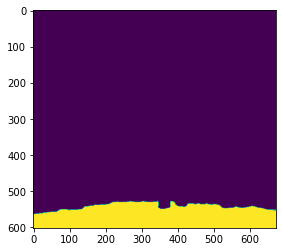

In [7]:
import matplotlib.pyplot as plt
import numpy as np
mask = np.zeros(shape=(new_frame.shape[0],new_frame.shape[1]))
color = [6,230,230]
if mask.shape[0]>0 and mask.shape[1]>0:
    for i in range(new_frame.shape[0]):
        for j in range(new_frame.shape[1]):
            if((new_frame[i][j]==color).all()):
                mask[i][j]=1
            else:
                mask[i][j]=0
    plt.imshow(mask)

In [46]:
def findpath(mask):
   midpoints=[]
   for i in range(mask.shape[0]):
        row_measure={"start":0,"end":0,"measure":0}
        measure=0
        max_measure=0 
        start=0
        for j in range(1,mask.shape[1]-1):
            if(measure==0):
                if(j<(mask.shape[1]-1) and mask[i][j]==1 and mask[i][j+1]==1):
                   measure+=1
                   start=j
            if(measure!=0):
                if(mask[i][j]==1 and mask[i][j+1]==1):
                    measure+=1
                    if(measure>max_measure and measure>40 and j>(mask.shape[1]-20)):
                            row_measure["start"]=start
                            row_measure["end"]=j
                            row_measure["measure"]=measure
                            max_measure=measure
                            measure=0;
                elif(measure>max_measure and measure>40):
                        row_measure["start"]=start
                        row_measure["end"]=j
                        row_measure["measure"]=measure
                        max_measure=measure
                        measure=0;
        midpoints.append(row_measure)
   return midpoints

In [47]:
midpoints = findpath(mask)

In [48]:
x=[]
y=[]
for i in range(len(midpoints)):
    y.append(i)
    x.append((midpoints[i]["start"]+midpoints[i]["end"])//2)

In [37]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

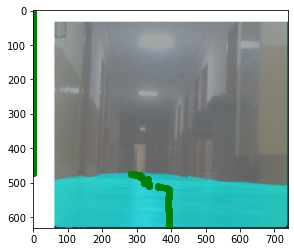

In [38]:
plt.scatter(x,y,color='g')
plt.imshow(frame)

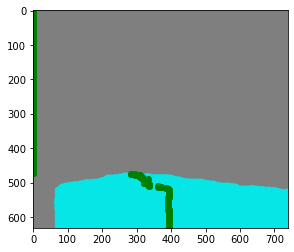

In [39]:
plt.scatter(x,y,color='g')
plt.imshow(new_frame)

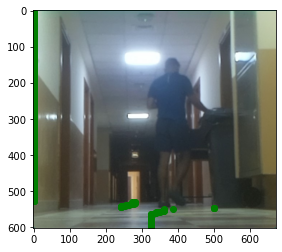

In [49]:
plt.scatter(x,y,color='g')
plt.imshow(frame)

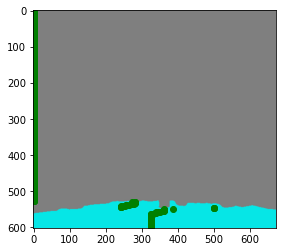

In [50]:
plt.scatter(x,y,color='g')
plt.imshow(new_frame)